In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

def error(est, tr):
    return 1.0 * np.abs(est-tr) / tr

def error_dt(row):
    return error(row['adaptives'], row['true_count']), error(row['big_cms'], row['true_count']), \
            error(row['cms'], row['true_count']), row['true_count']

def read_res(f):
    adaptives = []
    big_cmss = []
    cmss = []
    true_counts = []
    #64_4_16_1000_4096
    width, depth, layers, threshold, memory = list(map(int, f.split('_')))
    small_w = width
    with open('res/'+f, 'r') as f:
    #with open('res_zipf', 'r') as f:
        res = f.readlines()

    for l in res:
        adaptive, big_cms, cms, true_count = l.split(',')
        #keys.append(k1)
        adaptives.append(int(adaptive))
        big_cmss.append(int(big_cms))
        cmss.append(int(cms))
        true_counts.append(int(true_count))

    d = pd.DataFrame(columns=['adaptives',
                             'big_cms',
                             'cms',
                             'true_count'])

    d.adaptives = adaptives
    d.big_cms = big_cmss
    d.cms = cmss
    d.true_count = true_counts
    d.sort_values('true_count', ascending=False, inplace=True)
    d_error = d.apply(error_dt, axis=1)
    d_err = pd.DataFrame()
    d_err['adap'] = list(map(lambda x: x[0], d_error))
    d_err['big_cms'] = list(map(lambda x: x[1], d_error))
    d_err['cms'] = list(map(lambda x: x[2], d_error))

    big_w = small_w * layers
    small_epsilon = np.e / small_w
    big_epsilon = np.e / big_w

    s_add_error = small_epsilon * sum(d.true_count)
    b_add_error = big_epsilon * sum(d.true_count)

    d_err['cms_error_bound'] = list(map(lambda x: 1.0 * (s_add_error) / x[3], d_error))
    d_err['bcms_error_bound'] = list(map(lambda x: 1.0 * (b_add_error) / x[3], d_error))

    m_error = np.mean(d_err[:(1<<10)])
    m_error_a = np.mean(d_err)

    return d

def plot(f='adaptive_res.txt', small_w=256, depth=8, layers=8):    
    adaptives = []
    big_cmss = []
    cmss = []
    true_counts = []
    with open(f, 'r') as f:
    #with open('res_zipf', 'r') as f:
        res = f.readlines()

    for l in res:
        adaptive, big_cms, cms, true_count = l.split(',')
        #keys.append(k1)
        adaptives.append(int(adaptive))
        big_cmss.append(int(big_cms))
        cmss.append(int(cms))
        true_counts.append(int(true_count))

    d = pd.DataFrame(columns=['adaptives',
                             'big_cms',
                             'cms',
                             'true_count'])

    d.adaptives = adaptives
    d.big_cms = big_cmss
    d.cms = cmss
    d.true_count = true_counts
    d.sort_values('true_count', ascending=False, inplace=True)
    d_error = d.apply(error_dt, axis=1)
    d_err = pd.DataFrame()
    d_err['adap'] = list(map(lambda x: x[0], d_error))
    d_err['big_cms'] = list(map(lambda x: x[1], d_error))
    d_err['cms'] = list(map(lambda x: x[2], d_error))

    
    big_w = small_w * layers
    small_epsilon = np.e / small_w
    big_epsilon = np.e / big_w

    s_add_error = small_epsilon * sum(d.true_count)
    b_add_error = big_epsilon * sum(d.true_count)

    d_err['cms_error_bound'] = list(map(lambda x: 1.0 * (s_add_error) / x[3], d_error))
    d_err['bcms_error_bound'] = list(map(lambda x: 1.0 * (b_add_error) / x[3], d_error))

    m_error = np.mean(d_err[:(1<<10)])
    m_error_a = np.mean(d_err)

    d_err[:(1<<10)].plot(title = 'Width {}, depth {}'.format(small_w, 8),\
                        figsize=(15,15),\
                        )
    plt.xlabel('rank')
    plt.ylabel('error rate')
    plt.text(1<<9,d_err[:1<<10].max(axis=0 ).max(), 
             'topk mean error, adaptive {:0.2f}, cms {:0.2f}, big cms {:0.2f} \
             mean error, adaptive {:0.2f}, cms {:0.2f}, big cms {:0.2f}'.
             format(m_error['adap'], m_error['cms'], m_error['big_cms'],\
                   m_error_a['adap'], m_error_a['cms'], m_error_a['big_cms']), ha='center')
    
    plt.savefig('figures/{}_width{}_depth{}_rows{}.png'.format(file,small_w, depth, layers))
    return 0

def plot_topk(file='adaptive_res.txt', small_w=256, depth=8, layers=8, topk=10):    
    adaptives = []
    big_cmss = []
    cmss = []
    true_counts = []
    with open(file, 'r') as f:
    #with open('res_zipf', 'r') as f:
        res = f.readlines()

    for l in res:
        adaptive, big_cms, cms, true_count = l.split(',')
        #keys.append(k1)
        adaptives.append(int(adaptive))
        big_cmss.append(int(big_cms))
        cmss.append(int(cms))
        true_counts.append(int(true_count))

    d = pd.DataFrame(columns=['adaptives',
                             'big_cms',
                             'cms',
                             'true_count'])
    
    d.adaptives = adaptives
    d.big_cms = big_cmss
    d.cms = cmss
    d.true_count = true_counts
    d.sort_values('true_count', ascending=False, inplace=True)
    d_error = d.apply(error_dt, axis=1)
    d_err = pd.DataFrame()
    d_err['adapatives'] = list(map(lambda x: x[0], d_error))
    d_err['big_cms'] = list(map(lambda x: x[1], d_error))
    d_err['cms'] = list(map(lambda x: x[2], d_error))
    big_w = small_w * layers
    small_epsilon = np.e / small_w
    big_epsilon = np.e / big_w

    s_add_error = small_epsilon * sum(d.true_count)
    b_add_error = big_epsilon * sum(d.true_count)

    d_err['cms_error_bound'] = list(map(lambda x: 1.0 * (s_add_error) / x[3], d_error))
    d_err['bcms_error_bound'] = list(map(lambda x: 1.0 * (b_add_error) / x[3], d_error))

    m_error = np.mean(d_err[:topk])
    m_error_a = np.mean(d_err)

    plt.figure()
    d_err_p = d_err.loc[:topk, ['big_cms', 'adapatives']]
    d_err_p.plot(
        title = 'Width {}, depth {}, rows {}, top{}'.format(small_w, depth, layers, topk),\
        figsize=(15,15),
            )
    plt.xlabel('rank')
    plt.ylabel('error rate')
    plt.text(topk/2 ,d_err_p.max(axis=1 ).max(), 
             'top{} mean error, adaptive {:0.2f}, cms {:0.2f}, big cms {:0.2f}, \
             mean error, adaptive {:0.2f}, cms {:0.2f}, big cms {:0.2f}'.
             format(topk, m_error['adapatives'], m_error['cms'], m_error['big_cms'],\
                   m_error_a['adapatives'], m_error_a['cms'], m_error_a['big_cms']), ha='center')
    
    plt.savefig('figures/{}_width{}_depth{}_rows{}_top{}'.format(file, small_w, depth, layers, topk))
    return 0

Populating the interactive namespace from numpy and matplotlib


In [21]:
import os

r = {}
for dirpath, dirnames, filenames in os.walk('./res/'):
    for f in filenames:
        if f.endswith('4096'):
            r[f] = read_res(f)

In [23]:
r.keys()

['256_4_4_1000_4096',
 '256_8_2_1000_4096',
 '512_4_2_1000_4096',
 '128_4_8_1000_4096',
 '64_4_16_1000_4096',
 '64_8_8_1000_4096',
 '128_8_4_1000_4096']

In [2]:
import seaborn as sns

In [3]:
sns.boxplot?

0

<Figure size 432x288 with 0 Axes>

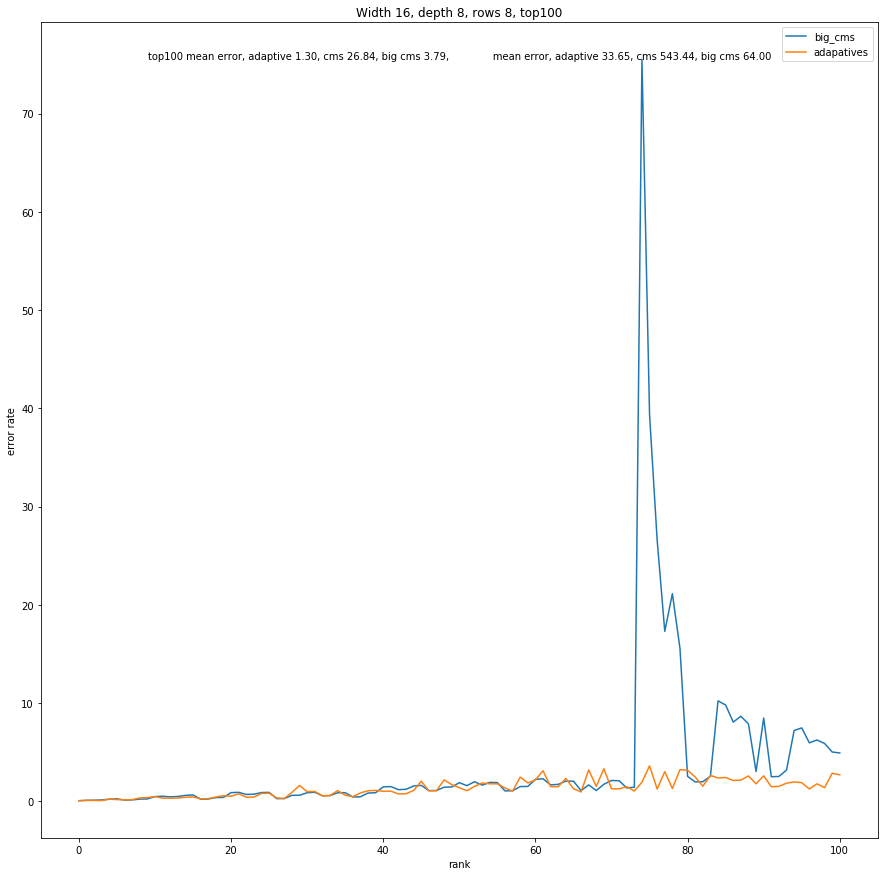

In [2]:
plot_topk('res_zipf', 1<<4, 1<<3, 1<<3, 100)

In [378]:
16 * 8 * 8

1024

In [336]:
d_err.loc[:10, ['big_cms', 'adaptives']]

/home/ch/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,big_cms,adaptives
0,0.021634,NaN
1,0.043108,NaN
2,0.050745,NaN
3,0.065896,NaN
4,0.100298,NaN
5,0.117691,NaN
6,0.036830,NaN
7,0.041768,NaN
8,0.076231,NaN
9,0.084971,NaN
